# Shahad Hatem Balkhashir
# ID: 2006676


## 1.   Load the Dataset

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/VehiclesPr1/"

vehicles.csv


In [ ]:
!ls -l "/content/drive/MyDrive/VehiclesPr1/vehicles.csv"

-rw------- 1 root root 1447955215 May  6  2021 /content/drive/MyDrive/VehiclesPr1/vehicles.csv


In [ ]:
file_path = "/content/drive/MyDrive/VehiclesPr1/vehicles.csv"
data = pd.read_csv(file_path)


## 2.   Preprocess the Dataset



In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [ ]:
data.head()  # View the first few rows
data.info()  # Get information about data types and missing values
data.describe()  # Get summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


<ipython-input-8-1cebcd50ea5a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], bins=30, kde=False)


<Axes: title={'center': 'Distribution of the prices'}, xlabel='price'>

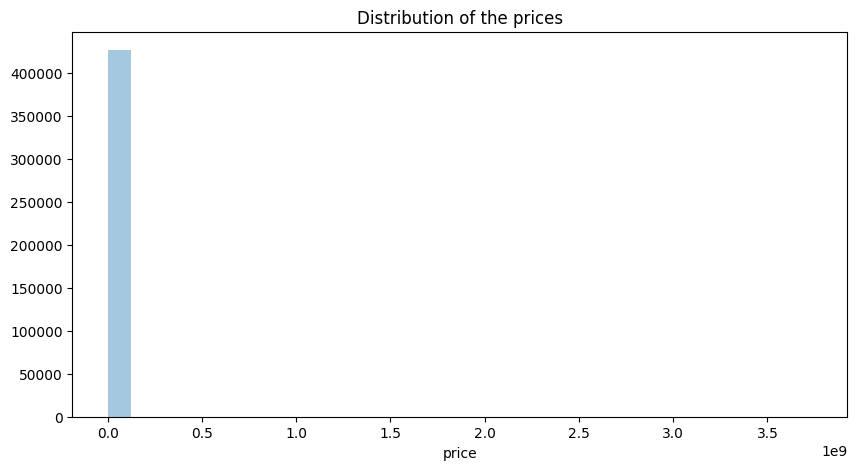

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the prices')
sns.distplot(data['price'], bins=30, kde=False)

To detect any outlier, we are going to use plots like boxplot and scatter plot to help us visualize the data better.

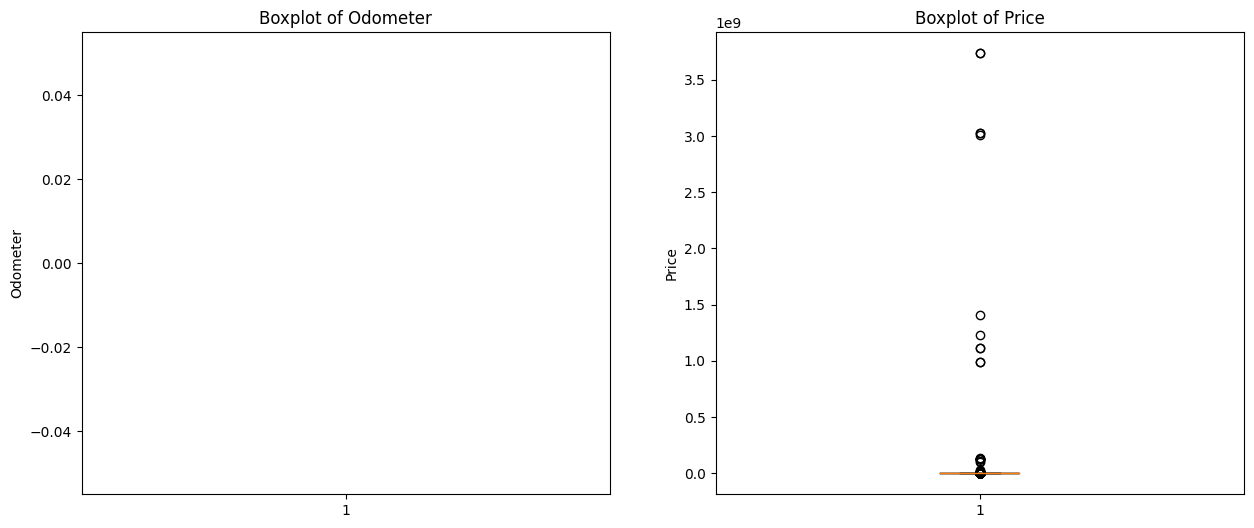

In [ ]:
# To detect any outlier, we are going to use plots like boxplot and scatter plot to help us visualize the data better
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for 'odometer'
axs[0].boxplot(data['odometer'])
axs[0].set_title('Boxplot of Odometer')
axs[0].set_ylabel('Odometer')

# Boxplot for 'price'
axs[1].boxplot(data['price'])
axs[1].set_title('Boxplot of Price')
axs[1].set_ylabel('Price')

plt.show()

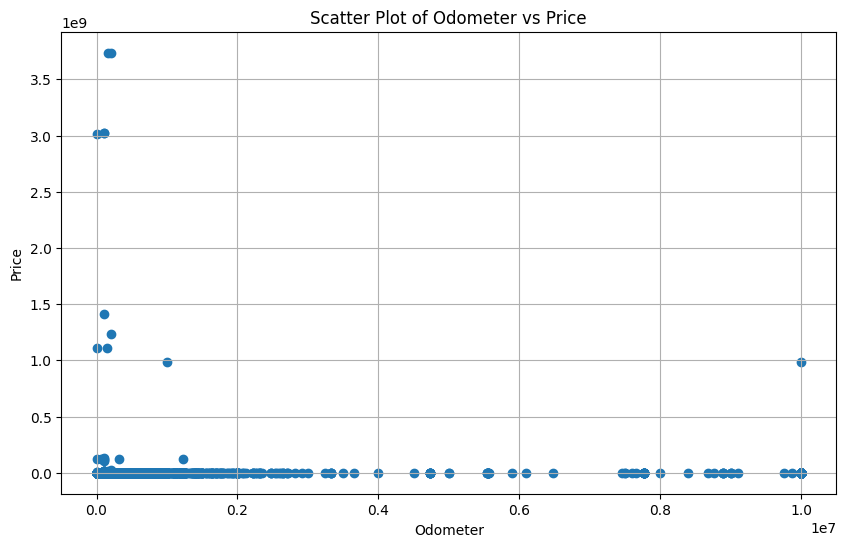

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['odometer'], data['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot of Odometer vs Price')
plt.grid(True)
plt.show()

In [ ]:
# Remove free cars, since they are not gonna help because there are some cars don't have meaningful price or the data collected in a wrong way idk
data = data[data['price'] > 600]

Removing outliers for both 'odometer' and 'price' columns, also using the function to handle missing values.

In [ ]:
# Removing outliers for both 'odometer' and 'price' columns, also using the function to handle missing values.
# Remove outliers for 'odometer'
Q1 = data['odometer'].quantile(0.25)
Q3 = data['odometer'].quantile(0.75)
IQR = Q3 - Q1
filter_odometer = (data['odometer'] <= Q3 + 3 * IQR)
data = data.loc[filter_odometer]

# Remove outliers for 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
filter_price = (data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)
data = data.loc[filter_price]

# Calculate and print the number of outliers removed for each column
outliers_removed_odometer = filter_odometer.sum()
outliers_removed_price = filter_price.sum()
print(outliers_removed_odometer, '(', '{:.2f}'.format(100 * outliers_removed_odometer / len(data)), '%', ')', 'outliers removed from "odometer"')
print(outliers_removed_price, '(', '{:.2f}'.format(100 * outliers_removed_price / len(data)), '%', ')', 'outliers removed from "price"')

379473 ( 102.05 % ) outliers removed from "odometer"
371839 ( 100.00 % ) outliers removed from "price"


Here I dropped all the columns that caused me troubles and I found them unnecessary

In [ ]:
data = data.drop(columns = [ 'id', 'region','url', 'region_url', 'VIN', 'paint_color',
        'image_url', 'county', 'lat', 'long', 'posting_date', 'model', 'description', 'manufacturer', 'size'])

In [ ]:
rm_rows = ['year', 'fuel', 'transmission', 'drive', 'type']
for column in rm_rows:
    data = data[~data[column].isnull()]

In [ ]:
data = data.replace(np.nan, 'null', regex=True)  # Replace missing values with 'null' for better handling later on

In [ ]:
data.head()

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
31,15000,2013.0,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al
32,27990,2012.0,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,al
33,34590,2016.0,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,al
34,35000,2019.0,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,al
35,29990,2016.0,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,al


In [ ]:
# Dealing With Categorical Variables, creating dummie
col = ['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'title_status', 'state']
data_new = pd.concat([data]+[pd.get_dummies(data[i],drop_first=True,prefix=i+'_') for i in col],axis=1)
data_new.drop(['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'title_status', 'state'],axis=1,inplace=True)
data_new.head()

,price,year,odometer,condition__fair,condition__good,condition__like new,condition__new,condition__null,condition__salvage,cylinders__12 cylinders,...,state__sd,state__tn,state__tx,state__ut,state__va,state__vt,state__wa,state__wi,state__wv,state__wy
31,15000,2013.0,128000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,27990,2012.0,68696.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,34590,2016.0,29499.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,35000,2019.0,43000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,29990,2016.0,17302.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Scale out the the numerical data except year, because I tried before standrizing year and got really bad results

std_scaler = StandardScaler()

for column in ['price', 'odometer']:
    data_new[column] = std_scaler.fit_transform(data_new[column].values.reshape(-1,1))

In [ ]:
data_new.head()

,price,year,odometer,condition__fair,condition__good,condition__like new,condition__new,condition__null,condition__salvage,cylinders__12 cylinders,...,state__sd,state__tn,state__tx,state__ut,state__va,state__vt,state__wa,state__wi,state__wv,state__wy
31,-0.278461,2013.0,0.544241,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,0.760208,2012.0,-0.405057,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,1.287938,2016.0,-1.032496,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,1.320722,2019.0,-0.816381,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,0.920126,2016.0,-1.227737,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Select all columns except 'price' for X
X = data_new.drop('price', axis=1)

# Select the 'price' column for y and reshape it
y = data_new['price'].values.reshape(-1, 1)

X = X.to_numpy()
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (182260, 92)
y_train shape: (182260, 1)


In [ ]:
m = X_train.shape[0]
n = X_train.shape[1]
m, n

(182260, 92)

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 3. Test the performance of the model by computing and reporting the MSE on the testset

The history of the cost:  [2.53637272e+017 4.15004344e+028 6.79034594e+039 1.11104374e+051
 1.81790179e+062 2.97447056e+073 4.86686088e+084 7.96321039e+095
 1.30294909e+107 2.13189939e+118 3.48823684e+129 5.70749082e+140]


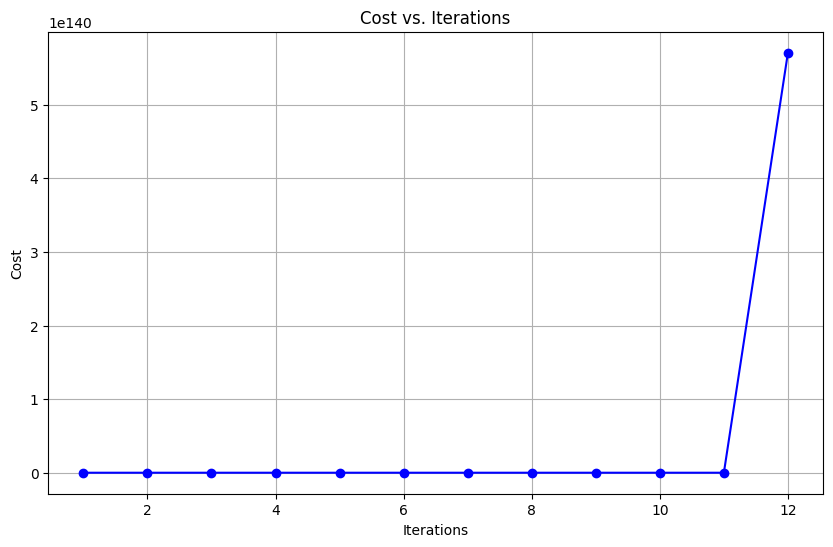

Most significant features: [14  6 22  0 21 32 10 19  3 31 27 30  1 84 88 83 50 63 35 34 40 75 18  4
 67 54 51 38 65 77 16 42 87 43 58 52 36 74 61 56 59  5 90 66  9 81 70 85
 39 69  8 49 91 82 71 24  7 80 48 73 15 41 62 37 29 11 57 44 47 64 60 89
 28 55 53 68 46 86 76 72 79 78 45  2 25 33 26 12 20 23 13 17]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cost(X, y, w):
    """Calculates the cost function efficiently.

    Args:
        X: Training data (n_samples, n_features).
        y: Target labels (n_samples,).
        w: Model weights (n_features, 1).

    Returns:
        The cost value.
    """
    prediction = X @ w
    return (1 / (2 * X.shape[0])) * np.sum((prediction - y) ** 2)  # Vectorized sum

def permutation_importance(X, y, model, cost_function, n_features):
    importance = np.zeros(n_features)
    for i in range(n_features):
        X_shuffled = X.copy()
        X_shuffled[:, i] = np.random.permutation(X_shuffled[:, i])  # Shuffle feature values
        original_cost = cost_function(X, y, model)
        shuffled_cost = cost_function(X_shuffled, y, model)
        importance[i] = original_cost - shuffled_cost  # Importance based on cost change

    # Get the indices of the most significant features
    sorted_indices = np.argsort(importance)[::-1]

    return sorted_indices

n = X_train.shape[1]
theta = np.ones((n, 1))

# Precompute X_train transpose for efficient matrix multiplication
XTX = np.transpose(X_train) @ X_train
XTy = np.transpose(X_train) @ y_train

learning_rate = 0.1
num_iterations = 12
cost_history = np.zeros(num_iterations)

for i in range(num_iterations):
    prediction = X_train @ theta
    gradient = (1 / X_train.shape[0]) * XTX @ theta - XTy  # gradient calculation
    theta = theta - learning_rate * gradient
    cost_history[i] = cost(X_train, y_train, theta)  # Calculate cost after update theta = learning_rate - gradient

# Check for convergence
tolerance = 1e-5
if num_iterations >= 10 and np.all(np.abs(cost_history[-1] - cost_history[-5:]) < tolerance):
    print("Converged after", i + 1, "iterations.")

# Reshape theta and flatten cost_history for plotting
theta = theta.reshape(-1, 1)
print("The history of the cost: " ,cost_history)
cost_history = cost_history.flatten()

# Plot the cost vs iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cost_history, marker='o', color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.grid(True)
plt.show()

# Assuming you have trained your model and have X_train and y_train
n_features = X_train.shape[1]
most_significant_features = permutation_importance(X_train, y_train, theta, cost, n_features)
print("Most significant features:", most_significant_features)

In [ ]:
y_pred = X_test @ theta # Compute predictions on the test set

mse_test = np.mean((y_pred - y_test) ** 2) # Calculate MSE on the test set

print(f"MSE on test set: {mse_test}")

MSE on test set: 1.1415141361316664e+141


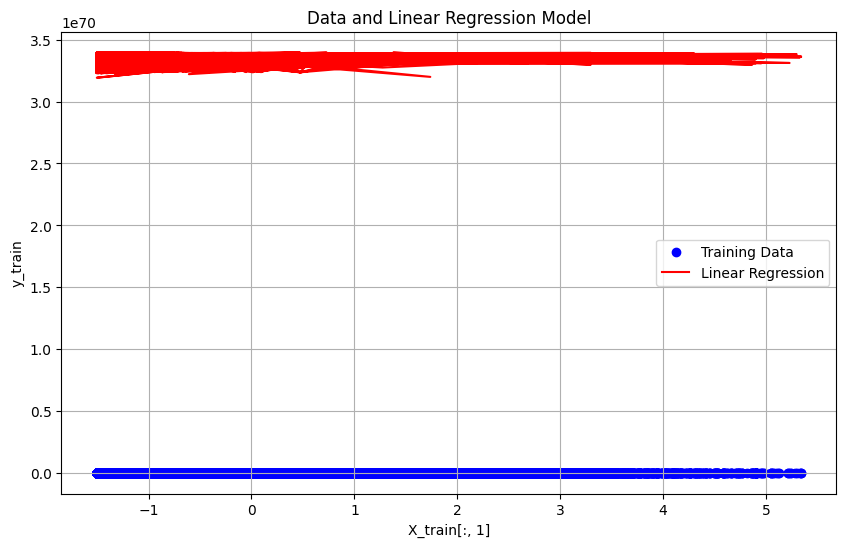

In [ ]:
import matplotlib.pyplot as plt
# Plot the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='b', label='Training Data')
plt.plot(X_train[:, 1], X_train @ theta, color='r', label='Linear Regression')
plt.xlabel('X_train[:, 1]')
plt.ylabel('y_train')
plt.title('Data and Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-27-593b26e21d4a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['price'], bins=30, kde=True)


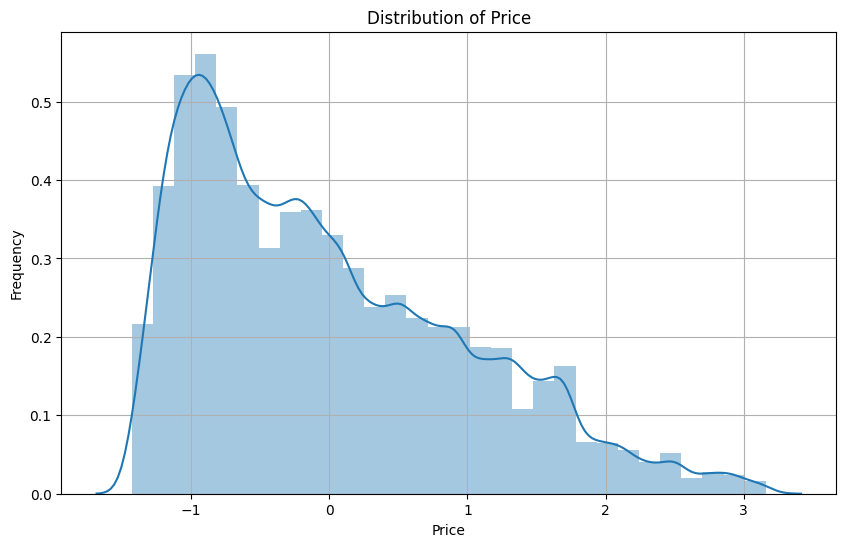

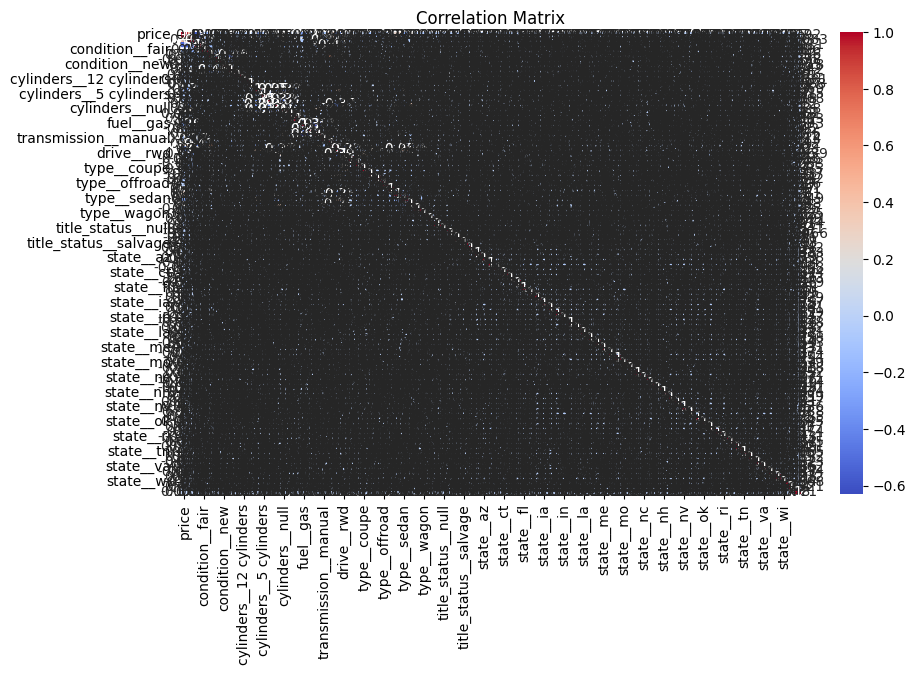

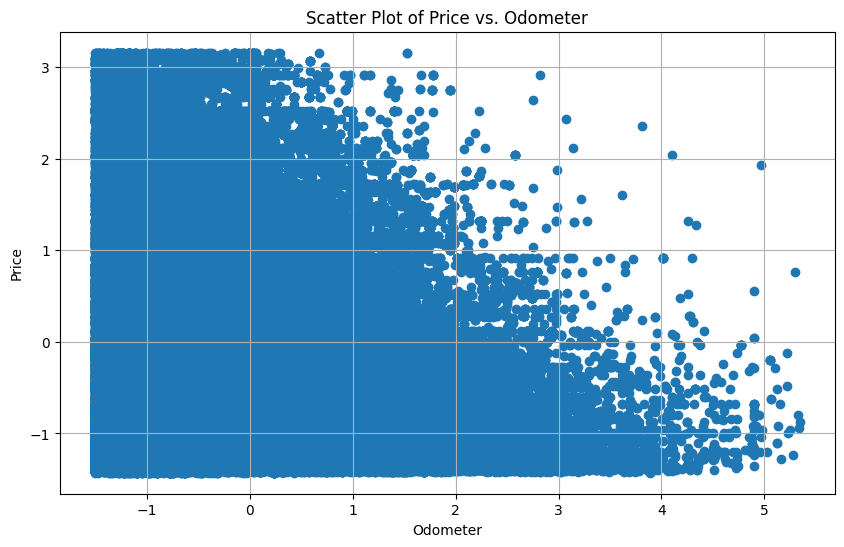

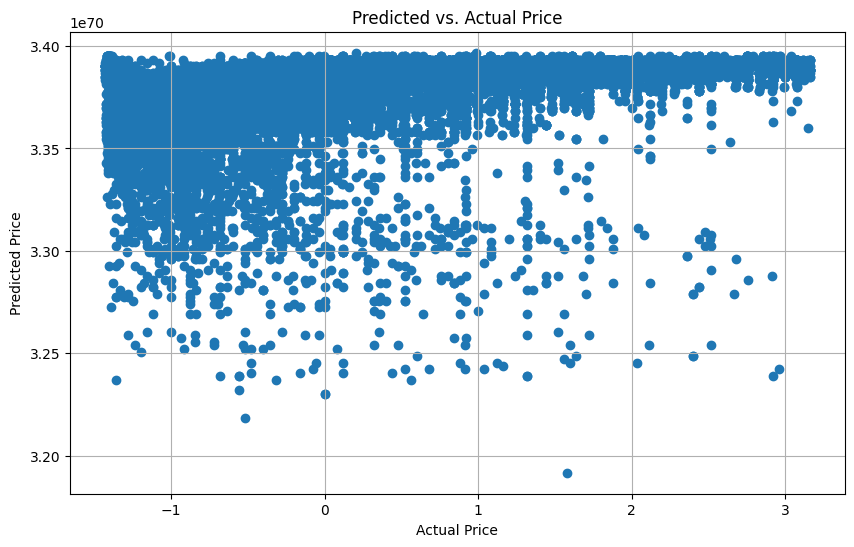

In [ ]:
# Plot the distribution of the price
plt.figure(figsize=(10, 6))
sns.distplot(data_new['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.grid(True)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot the scatter plot of price vs. odometer
plt.figure(figsize=(10, 6))
plt.scatter(data_new['odometer'], data_new['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Odometer')
plt.grid(True)
plt.show()

# Plot the predicted vs actual price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Price')
plt.grid(True)
plt.show()


In [ ]:
# After training loop
final_feature_importances = np.abs(theta)

Most significant features: [14  6 22  0 21 32 10 19  3 31 27  1 30 84 88 83 63  4 35 40 18 34 50 54
 67 38 51 65 77 16 43 87 58 42 36 61 52 59 90 74 48  5 85 66  9 69  8 39
 82 80 91 70 24 49 56 71  7 15 62 73 57 37 81 41 29 68 11 60 75 47 64 55
 28 44 89 53 86 46 72 76 79 78 45  2 25 33 26 20 12 23 13 17]

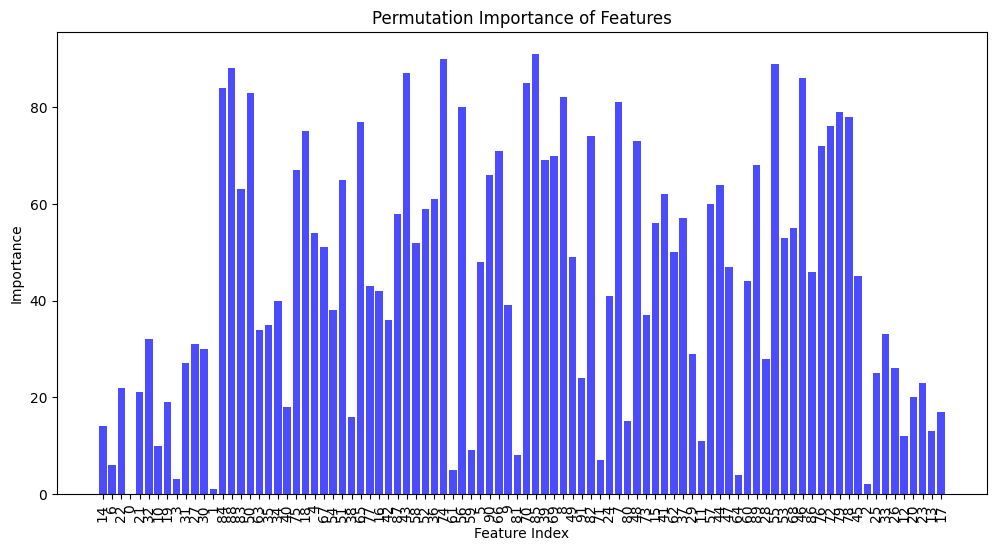

In [ ]:
# Calculate feature importances using permutation importance
feature_importances = permutation_importance(X_train, y_train, theta, cost, n_features)

# Display a bar chart for the most important features
plt.figure(figsize=(12, 6))
plt.bar(range(n_features), feature_importances, color='b', alpha=0.7)
plt.xticks(range(n_features), most_significant_features, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Permutation Importance of Features')
plt.show()